In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#read CSV file
df = pd.read_csv('50_Startups.csv')

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
print(df.info())
print('\n=================================================================\n')
print(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


                 count         mean            std       min          25%  \
R&D Spend         50.0   73721.6156   45902.256482      0.00   39936.3700   
Administration    50.0  121344.6396   28017.802755  51283.14  103730.8750   
Marketing Spend   50.0  211025.0978  122290.310726      0.00  129300.1325   
Profit            50.0  112012.6392   40306.180338  14681.40   90138.9025   

                        50%          75%        max  
R&D Spend         73051.080  101602.8000  165349.20  
Administration   122699

In [6]:
# null values check
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000




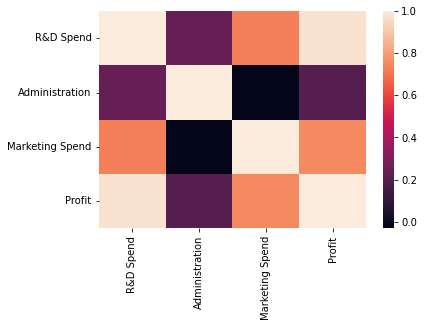

In [7]:
print (df.drop('State', axis  = 1).corr())
print('\n=================================================================\n')
sns.heatmap(df.drop('State', axis  = 1).corr());

In [8]:
correlation = pd.DataFrame(1/(1-df.corr()))
correlation

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,inf,1.319183,3.626449,36.901003
Administration,1.319183,inf,0.968848,1.251121
Marketing Spend,3.626449,0.968848,inf,3.964568
Profit,36.901003,1.251121,3.964568,inf


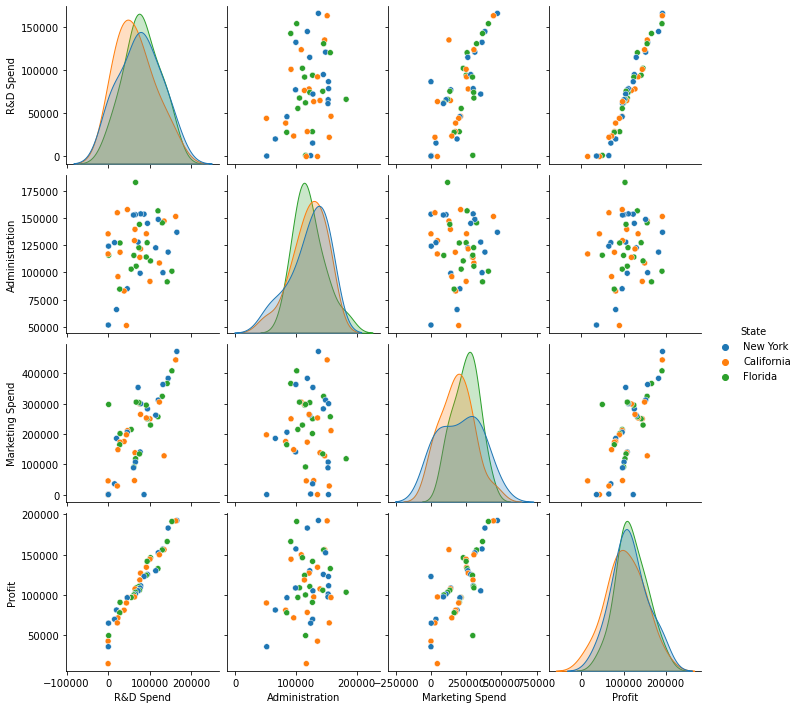

In [9]:
#pairplot for checking multicollinearity and coorelation.
sns.pairplot(df,hue = 'State');

<AxesSubplot:>

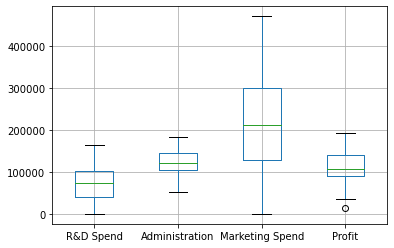

In [10]:
# checking for outliers using box plot.
df.boxplot()

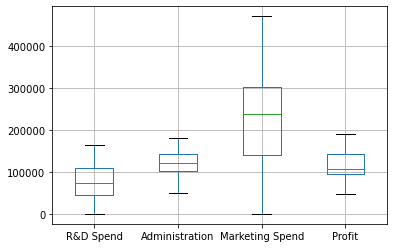

In [11]:
df = df[(df[['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']] != 0).all(axis=1)]
df.boxplot();

In [12]:
X = df.drop('Profit', axis=1)
y = df.Profit

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.8,random_state=101)
print(X_train.shape)
print(X_test.shape)

(36, 4)
(10, 4)


In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder

numeric_columns=list(X_train.select_dtypes('float64').columns)
categorical_columns=list(X_train.select_dtypes('object').columns)

pipeline=ColumnTransformer([
    ('num',StandardScaler(),numeric_columns),
    ('cat',OneHotEncoder(drop='first'),categorical_columns),
])

std_X_train = pipeline.fit_transform(X_train)
std_X_test = pipeline.transform(X_test)
std_y_train = y_train.to_numpy()
std_y_test = y_test.to_numpy()
#(std_X_test,std_X_train,std_y_test,std_y_train) = standardised data with dummy variables

In [15]:
df_encoded = pd.get_dummies(df, sparse=True,drop_first = True)
X_n = df_encoded.drop('Profit', axis=1)
y_n = df_encoded.Profit
X_train, X_test, y_train, y_test = train_test_split(X_n,y_n, train_size= 0.8,random_state=101)
#(X_train, X_test, y_train, y_test) = original data with dummy variables

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)

In [17]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
model = LinearRegression()
model.fit(X_train_pca,y_train)
y_pred_slr = model.predict(X_test_pca)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_slr))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred_slr))

Mean squared error: 53336398.32
Coefficient of determination: 0.96


In [19]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_squared_error

model_lasso = Lasso(0.2)
model_lasso.fit(X_train,y_train)
y_pred_lasso = model_lasso.predict(X_test)
#print(i,mean_squared_error(std_y_test, y_pred_lasso),r2_score(y_test, y_pred_lasso))
print("Mean squared error: %.2f" % mean_squared_error(std_y_test, y_pred_lasso))
print("Coefficient of determination: %.2f" % r2_score(std_y_test, y_pred_lasso))


Mean squared error: 55366876.44
Coefficient of determination: 0.95


In [20]:
from sklearn.linear_model import Ridge
model_ridge = Ridge(0.2)
model_ridge.fit(X_train,y_train)
y_pred_ridge = model_ridge.predict(X_test)
#print(i,mean_squared_error(std_y_test, y_pred_lasso),r2_score(y_test, y_pred_lasso))
print("Mean squared error: %.2f" % mean_squared_error(std_y_test, y_pred_lasso))
print("Coefficient of determination: %.2f" % r2_score(std_y_test, y_pred_lasso))

Mean squared error: 55366876.44
Coefficient of determination: 0.95


In [21]:
from sklearn.tree import DecisionTreeRegressor
model_DT = DecisionTreeRegressor(criterion='squared_error',
    splitter='best',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=2,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=100,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0,
)
model_DT.fit(X_train,y_train)
y_pred_DT = model_DT.predict(X_test)
#print(i,mean_squared_error(std_y_test, y_pred_lasso),r2_score(y_test, y_pred_lasso))
print("Mean squared error: %.2f" % mean_squared_error(std_y_test, y_pred_DT))
print("Coefficient of determination: %.2f" % r2_score(std_y_test, y_pred_DT))

Mean squared error: 73835767.68
Coefficient of determination: 0.94


In [22]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=200,max_depth =5,random_state = 101,min_samples_split = 2,min_samples_leaf = 1,max_leaf_nodes = None)
model_rf.fit(X_train,y_train)
y_pred_rf = model_rf.predict(X_test)
#print(i,mean_squared_error(std_y_test, y_pred_lasso),r2_score(y_test, y_pred_lasso))
print("Mean squared error: %.2f" % mean_squared_error(std_y_test, y_pred_rf))
print("Coefficient of determination: %.2f" % r2_score(std_y_test, y_pred_rf))

Mean squared error: 65058020.65
Coefficient of determination: 0.95


In [23]:
from sklearn.ensemble import AdaBoostRegressor
model_AB = AdaBoostRegressor(n_estimators=200, learning_rate=1, loss='square', random_state=101)
model_AB.fit(X_train,y_train)
y_pred_AB = model_AB.predict(X_test)
#print(i,mean_squared_error(std_y_test, y_pred_lasso),r2_score(y_test, y_pred_lasso))
print("Mean squared error: %.2f" % mean_squared_error(std_y_test, y_pred_AB))
print("Coefficient of determination: %.2f" % r2_score(std_y_test, y_pred_AB))

Mean squared error: 75646158.80
Coefficient of determination: 0.94


In [24]:
from sklearn.ensemble import GradientBoostingRegressor
model_gb = GradientBoostingRegressor(loss = 'huber',learning_rate=1,n_estimators =200,criterion = 'mse',min_samples_split = 2,min_samples_leaf = 1,max_depth = 5,random_state = 101)
model_gb.fit(X_train,y_train)
y_pred_gb = model_gb.predict(X_test)
#print(i,mean_squared_error(std_y_test, y_pred_lasso),r2_score(y_test, y_pred_lasso))
print("Mean squared error: %.2f" % mean_squared_error(std_y_test, y_pred_gb))
print("Coefficient of determination: %.2f" % r2_score(std_y_test, y_pred_gb))

Mean squared error: 76757883.85
Coefficient of determination: 0.94


[19:53:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "objectvie" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Mean squared error: 65292114.90
Coefficient of determination: 0.95


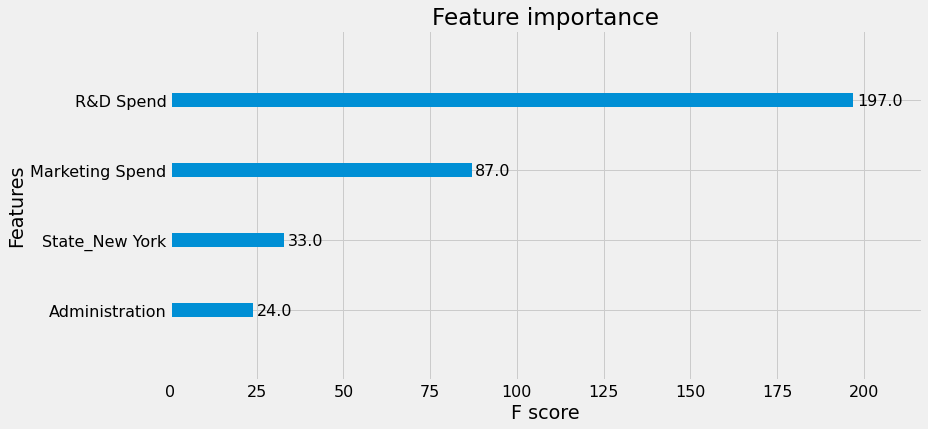

In [25]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(max_depth=3, n_estimators=100, n_jobs=2,
                           objectvie='reg:squarederror', booster='gbtree',
                           random_state=42, learning_rate=0.05)
model_xgb.fit(X_train,y_train)
y_pred_xgb = model_xgb.predict(X_test)
#print(i,mean_squared_error(std_y_test, y_pred_lasso),r2_score(y_test, y_pred_lasso))
print("Mean squared error: %.2f" % mean_squared_error(std_y_test, y_pred_xgb))
print("Coefficient of determination: %.2f" % r2_score(std_y_test, y_pred_xgb))
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(model_xgb, ax=ax)
plt.show();

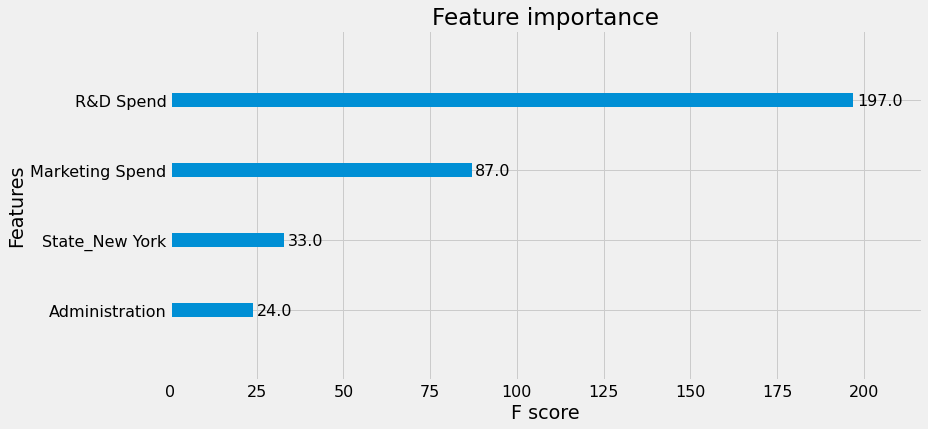

In [26]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(model_xgb, ax=ax)
plt.show();

In [27]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)
params = {'booster' : 'gbtree','objective' :'reg:squarederror'}
xg_reg = xgb.train(params = params,dtrain = DM_train, num_boost_round=10)
preds = xg_reg.predict(DM_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, preds))
print("Coefficient of determination: %.2f" % r2_score(y_test, preds))

Mean squared error: 85694102.53
Coefficient of determination: 0.93


In [29]:
import keras
from keras.layers import Dense
from keras.models import Sequential

In [74]:
# Save the number of columns in predictors: n_cols
n_cols = X_train.columns

model_nn = Sequential()
model_nn.add(Dense(16, activation='relu', input_shape=(5,)))
model_nn.add(Dense(8,activation='relu'))
model_nn.add(Dense(4,activation='relu'))
model_nn.add(Dense(1))
model_nn.compile(optimizer='adam', loss='mean_squared_error')
model_nn.fit(X_train,y_train,epochs=50)


Epoch 1/50
2/2 [==============================] - 0s 3ms/step - loss: 9280833536.0000
Epoch 2/50
2/2 [==============================] - 0s 3ms/step - loss: 8143578112.0000
Epoch 3/50
2/2 [==============================] - 0s 3ms/step - loss: 7141645312.0000
Epoch 4/50
2/2 [==============================] - 0s 2ms/step - loss: 6196987904.0000
Epoch 5/50
2/2 [==============================] - 0s 3ms/step - loss: 5386202624.0000
Epoch 6/50
2/2 [==============================] - 0s 2ms/step - loss: 4658726912.0000
Epoch 7/50
2/2 [==============================] - 0s 2ms/step - loss: 3972805888.0000
Epoch 8/50
2/2 [==============================] - 0s 5ms/step - loss: 3395663360.0000
Epoch 9/50
2/2 [==============================] - 0s 2ms/step - loss: 2875974400.0000
Epoch 10/50
2/2 [==============================] - 0s 4ms/step - loss: 2409559040.0000
Epoch 11/50
2/2 [==============================] - 0s 3ms/step - loss: 2023316608.0000
Epoch 12/50
2/2 [==============================] - 0

In [75]:
nn_pred  = model_nn.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, nn_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, nn_pred))

Mean squared error: 96024352.73
Coefficient of determination: 0.92
